In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

# from sklearn import tree
# from sklearn.neural_network import MLPClassifier
from sklearn.svm import NuSVR
# from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

import matplotlib.pyplot as plt

In [28]:
dados = pd.read_csv("dados_artigo.csv",header=1)
X = np.array(dados[["NaCl",	"Rt (rpm)",	"T(°C)","t (min)",	"DB (%)","pH","Co (mg/L)"]])
y = np.array(dados["R(%)"])
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.2, random_state=None)

# y_test = y_test.reshape(-1, 1)
# print(y_test)
Xs = preprocessing.MinMaxScaler(feature_range=(0, 1))
# Xs = preprocessing.StandardScaler()
Xs.fit(X_train)
X_train_norm = Xs.transform(X_train)
X_test_norm = Xs.transform(X_test)
# ys = preprocessing.StandardScaler()
ys = preprocessing.MinMaxScaler(feature_range=(0, 1))
ys.fit(y_train.reshape(-1, 1))
y_train_norm = ys.transform(y_train.reshape(-1, 1))
y_test_norm = ys.transform(y_test.reshape(-1, 1))
# print(y_test_norm.ravel())

svr = NuSVR(tol=1e-05,verbose=True,gamma="scale")
svr.fit(X_train_norm,y_train_norm.ravel())
svr.score(X_test_norm,y_test_norm.ravel())

[LibSVM].....*
optimization finished, #iter = 1858
epsilon = 0.021476
obj = -6.942139, rho = -0.658767
nSV = 100, nBSV = 68


0.9254113266390495

In [29]:
yp = svr.predict(X_test_norm)
res = pd.DataFrame()
res["dadosN"]=y_test_norm.ravel()
res["preditoN"] = yp
res["dadosO"] = y_test.ravel()
res["PreditoO"] = ys.inverse_transform(yp.reshape(-1, 1))
res

,dadosN,preditoN,dadosO,PreditoO
0,0.870024,0.849231,86.84,85.006736
1,0.762958,0.818663,77.40,82.311508
2,0.527617,0.598431,56.65,62.893639
3,0.878644,0.878746,87.60,87.609042
4,0.361234,0.442748,41.98,49.167101
5,0.822842,0.818612,82.68,82.307064
6,0.870251,0.876624,86.86,87.421930
7,0.821254,0.848583,82.54,84.949526
8,0.834751,0.771718,83.73,78.172410
9,0.802654,0.808615,80.90,81.425586


In [ ]:
svr.score(X_train_norm,y_train_norm.ravel())

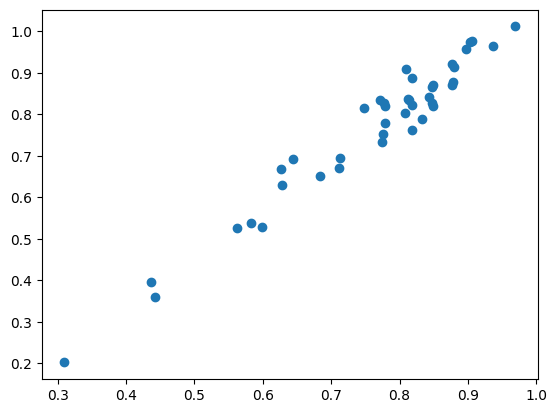

In [30]:
plt.scatter(yp,y_test_norm.ravel())